# **Análisis funcional de genes**

Este trabajo es parte de mi roceso de aprendizaje en la asignatura de Herramientas y Algoritmos en Bioinformática, en este trabajo me basaré en el [código](https://amoyag.github.io/HAB/functional_analysis) de mi profesor Moya García Aurelio con perfil en github de [amoyag](https://github.com/amoyag/HAB)

**TAREA:** Cargue un script de Python o un Jupyter Notebook que incluya una implementación detallada de un análisis funcional de los genes COX4I2, ND1 y ATP6. El análisis debe utilizar bibliotecas de Python para evaluar los procesos biológicos asociados con estos genes. Asegúrese de que su código se ajuste a la rúbrica de evaluación, es decir, que esté bien documentado y describa claramente los métodos y las bases de datos utilizados para obtener información funcional.

## **Introducción al análisis funcional en bioinformática**





El análisis funcional en bioinformática busca entender el rol de genes o proteínas en procesos biológicos. Un método común es el análisis de sobrerrepresentación, que compara funciones biológicas enriquecidas en un grupo de genes de interés frente a un grupo de referencia.

Para esto, se usa la prueba exacta de Fisher, que evalúa si la proporción de genes de interés con una función específica es mayor que en el grupo de referencia. El resultado indica si esa función está significativamente sobrerrepresentada en el grupo estudiado.

La fórmula para calcular el valor p con la prueba exacta de Fisher es:
 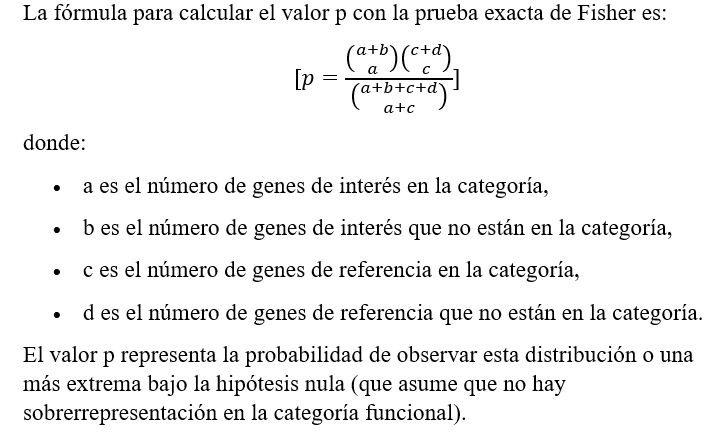


El valor p de la prueba exacta de Fisher puede ser muy pequeño, indicando una sobrerrepresentación significativa. Para controlar la tasa de descubrimientos falsos, se aplica una corrección del p-valor, como el método de Benjamini-Hochberg.

El Gene Set Enrichment Analysis (GSEA) identifica diferencias significativas en un conjunto de genes entre dos estados biológicos. A diferencia del análisis de sobrerrepresentación, GSEA analiza todos los genes según su nivel de expresión, capturando cambios sutiles en genes relacionados. Utiliza pruebas de permutación para evaluar la significancia.

El análisis funcional convierte grandes volúmenes de datos genómicos en información biológica significativa, y hay herramientas en Python que simplifican este proceso.

## **Carga de librerías usadas**
En un futuro se explicarán más detalladamente las siguientes librerías:

1.   Biopython
2.   GOATOOLS
3.   Enrichr
4.   STRINGdb



In [ ]:
#Carga de librerías usadas en este proyecto
try:
    from Bio import Entrez
except ModuleNotFoundError:
    # Si no está instalado Biopython, se instala automáticamente
    !pip install biopython
    from Bio import Entrez

import time

#segundo chunk
try:
    from goatools import obo_parser
except ModuleNotFoundError:
    # Si no está instalado goatools, se instala automáticamente
    !pip install goatools
    from goatools import obo_parser

from goatools.go_enrichment import GOEnrichmentStudy
from goatools.associations import read_gaf
import random
import requests
import gzip
import shutil
import os
!pip install mygene
import mygene
#NUEVA LIBRERÍA
from goatools.obo_parser import GODag


#tercer y cuarto chunk
import requests
import json



## **Biopython**

es una herramienta para la computación biológica que ofrece funciones para análisis de secuencias, consultas a bases de datos y recuperación de anotaciones. Aunque no es específicamente para análisis funcional, permite obtener datos como anotaciones funcionales, términos GO y rutas biológicas, siendo útil para complementar otros programas especializados en análisis funcional.

Para el ejemplo de esta tarea se nos pide una implementación detallada de un **análisis funcional de los genes COX4I2, ND1 y ATP6.**

In [64]:
gene_symbols = ["COX4I2", "ND1", "ATP6"]

In [55]:
def fetch_gene_annotations(gene_symbols, email="your_email@example.com"):
    Entrez.email = email
    gene_annotations = {}

    for gene in gene_symbols:
        try:
            # Search for the gene in Entrez
            handle = Entrez.esearch(db="gene", term=f"{gene}[Gene] AND Homo sapiens[Organism]")
            record = Entrez.read(handle)
            handle.close()

            if record['IdList']:
                gene_id = record['IdList'][0]

                # Fetch the gene summary to get functional annotations
                handle = Entrez.efetch(db="gene", id=gene_id, rettype="gb", retmode="text")
                gene_record = handle.read()
                handle.close()

                # Store the fetched annotation
                gene_annotations[gene] = gene_record
                print(f"Anotaciones para el {gene} fue realizado con éxito.")
            else:
                print(f"Hubo un problema obteniendo datos del gen: {gene}")

            # Pause to avoid overwhelming the Entrez servers
            time.sleep(1)

        except Exception as e:
            print(f"An error occurred while fetching annotations for {gene}: {e}")

    return gene_annotations

# Example usage
annotations = fetch_gene_annotations(gene_symbols)
for gene, annotation in annotations.items():
    print(f"\nAnotaciones para el gen: {gene}:\n{annotation}\n{'='*50}\n")

Anotaciones para el COX4I2 fue realizado con éxito.
Anotaciones para el ND1 fue realizado con éxito.
Anotaciones para el ATP6 fue realizado con éxito.
Hubo un problema obteniendo datos del gen: EJEMPLOERRONEO

Anotaciones para el gen: COX4I2:

1. COX4I2
Official Symbol: COX4I2 and Name: cytochrome c oxidase subunit 4I2 [Homo sapiens (human)]
Other Aliases: COX4, COX4-2, COX4B, COX4L2, COXIV-2, dJ857M17.2
Other Designations: cytochrome c oxidase subunit 4 isoform 2, mitochondrial; COX IV-2; cytochrome c oxidase subunit IV-like 2
Chromosome: 20; Location: 20q11.21
Annotation: Chromosome 20 NC_000020.11 (31637912..31645006)
MIM: 607976
ID: 84701




Anotaciones para el gen: ND1:

1. ND1
Official Symbol: MT-ND1 and Name: mitochondrially encoded NADH dehydrogenase 1 [Homo sapiens (human)]
Other Aliases: MTND1, ND1
Other Designations: NADH dehydrogenase subunit 1
Mitochondrion: MT
Annotation: Chromosome MT NC_012920.1 (3307..4262)
ID: 4535




Anotaciones para el gen: ATP6:

1. ATP6
Official

Los resultados obtenidos a partir del código confirman las anotaciones funcionales y las ubicaciones genómicas de los genes **COX4I2**, **ND1**, y **ATP6** en humanos. Para **COX4I2**, el código muestra que está ubicado en el cromosoma 20 y asociado con la producción de energía en las mitocondrias. **ND1** y **ATP6** son genes mitocondriales que participan en la cadena de transporte de electrones y la síntesis de ATP, respectivamente. Esta información estructurada en el código permite validar que cada gen trabaja en la bioenergética celular sugieriendo su implicación en estudios sobre metabolismo y enfermedades mitocondriales.

## **GOATOOLS**
es una biblioteca de Python que ayuda con el análisis de enriquecimiento de Gene Ontology (GO). Permite a los investigadores realizar análisis estadísticos sobre un conjunto de genes para determinar qué procesos biológicos, componentes celulares o funciones moleculares se enriquecen significativamente.

In [65]:
def perform_go_enrichment_analysis(
        gene_symbols,
        obo_url="http://current.geneontology.org/ontology/go-basic.obo",
        gaf_url="http://current.geneontology.org/annotations/goa_human.gaf.gz",
        email="your_email@example.com",
        background_size=1000,
        alpha=0.05
    ):
    # File paths
    obo_file_path = "go-basic.obo"
    compressed_gaf_file_path = "goa_human.gaf.gz"
    extracted_gaf_file_path = "goa_human.gaf"

    # Download OBO file if it doesn't exist
    if not os.path.exists(obo_file_path):
        try:
            response = requests.get(obo_url)
            response.raise_for_status()
            with open(obo_file_path, 'wb') as file:
                file.write(response.content)
            print(f"Successfully downloaded 'go-basic.obo' to {obo_file_path}")
        except requests.exceptions.RequestException as e:
            print(f"Error downloading OBO file: {e}")
            return

    # Download and extract GAF file if it doesn't exist
    if not os.path.exists(extracted_gaf_file_path):
        try:
            response = requests.get(gaf_url)
            response.raise_for_status()
            with open(compressed_gaf_file_path, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded 'goa_human.gaf.gz' to {compressed_gaf_file_path}")

            with gzip.open(compressed_gaf_file_path, 'rb') as f_in, open(extracted_gaf_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
            print(f"Extracted '{extracted_gaf_file_path}'")
        except requests.exceptions.RequestException as e:
            print(f"Error downloading GAF file: {e}")
            return

    # Initialize MyGene client to convert gene symbols to UniProt IDs
    mg = mygene.MyGeneInfo()
    query_result = mg.querymany(gene_symbols, scopes='symbol', fields='uniprot', species='human')

    study_gene_uniprot_ids = [
        gene.get('uniprot', {}).get('Swiss-Prot')
        for gene in query_result
        if gene.get('uniprot', {}).get('Swiss-Prot')
    ]

    # Print converted UniProt IDs
    print("Converted UniProt IDs for the study genes:")
    for gene_symbol, uniprot_id in zip(gene_symbols, study_gene_uniprot_ids):
        print(f"Gene Symbol: {gene_symbol}, UniProt ID: {uniprot_id}")

    # Extract background genes from the GAF file
    all_genes = set()
    try:
        with open(extracted_gaf_file_path, 'r') as gaf_file:
            for line in gaf_file:
                if not line.startswith("!"):
                    gene_identifier = line.strip().split("\t")[1]
                    all_genes.add(gene_identifier)
        print(f"Extracted {len(all_genes)} gene identifiers from GAF file.")
    except Exception as e:
        print(f"Error reading GAF file: {e}")
        return

    # Create background gene list with specified size
    all_genes_list = list(all_genes)
    random.seed(42)
    background_gene_list = random.sample(all_genes_list, background_size)
    background_gene_list.extend(g for g in study_gene_uniprot_ids if g not in background_gene_list)

    # Load GO DAG and gene associations
    go = GODag(obo_file_path)
    gene2go = read_gaf(extracted_gaf_file_path)

    # Run GO enrichment study
    go_enrich = GOEnrichmentStudy(
        background_gene_list, gene2go, go,
        propagate_counts=False, alpha=alpha, methods=['fdr_bh']
    )
    enriched_results = go_enrich.run_study(study_gene_uniprot_ids)

    # Display significant GO terms
    for res in enriched_results:
        if res.p_fdr_bh < alpha:
            print(f"GO ID: {res.GO}, Description: {res.name}, P-value: {res.p_fdr_bh}")

# Example usage
#gene_symbols = ["COX4I2", "ND1", "ATP6"]
perform_go_enrichment_analysis(gene_symbols)

INFO:biothings.client:querying 1-3...
INFO:biothings.client:done.
INFO:biothings.client:Finished.


Converted UniProt IDs for the study genes:
Gene Symbol: COX4I2, UniProt ID: Q96KJ9
Gene Symbol: ND1, UniProt ID: P03886
Gene Symbol: ATP6, UniProt ID: P00846
Extracted 44591 gene identifiers from GAF file.
go-basic.obo: fmt(1.2) rel(2024-09-08) 44,296 Terms
HMS:0:00:24.872554 773,774 annotations READ: goa_human.gaf 
36359 IDs in loaded association branch, BP

Load  Ontology Enrichment Analysis ...
 82%    824 of  1,003 population items found in association

Runing  Ontology Analysis: current study set of 3 IDs.
100%      3 of      3 study items found in association
100%      3 of      3 study items found in population(1003)
Calculating 1,997 uncorrected p-values using fisher_scipy_stats
   1,997 terms are associated with    824 of  1,003 population items
      14 terms are associated with      3 of      3 study items
  METHOD fdr_bh:
       2 GO terms found significant (< 0.05=alpha) (  2 enriched +   0 purified): statsmodels fdr_bh
       3 study items associated with significant GO I

Se realizó un análisis de enriquecimiento funcional sobre un conjunto de genes de interés (COX4I2, ND1 y ATP6 en esta tarea), a fin de identificar procesos biológicos en los que estos genes estan involucrados de manera significativa. Para lograr esto, primero se consultaron y convirtieron los símbolos génicos en identificadores UniProt, facilitando la vinculación con términos de la ontología genética (Gene Ontology, GO). Luego, se descargaron y procesaron los archivos GO necesarios, incluyendo el archivo de anotaciones (GAF) y la estructura de ontología (OBO), para construir un marco completo de asociaciones entre genes y términos GO. En la fase de análisis, el código comparó el conjunto de genes de interés con una población de referencia, identificando términos GO significativamente asociados mediante pruebas estadísticas (con corrección de Benjamini-Hochberg). Como resultado, se destacaron dos procesos relevantes: **el transporte transmembrana de protones** y **la síntesis mitocondrial de ATP impulsada por fuerza motriz de protones**, con p-valores ajustados significativos, sugiriendo que estos genes desempeñan roles críticos en procesos bioenergéticos.

## **Enrichr**
 es una potente herramienta basada en la web y API para realizar análisis de enriquecimiento de conjuntos de genes. Ayuda a los investigadores a determinar si un conjunto predefinido de genes está significativamente sobrerrepresentado en una lista proporcionada por el usuario, lo que proporciona información sobre los procesos biológicos, las vías y las funciones relacionadas con los genes de interés. Enrichr admite una amplia colección de bibliotecas de conjuntos de genes, incluidas las vías KEGG, Gene Ontology (GO), Reactome y muchas más, lo que la hace muy versátil para el análisis funcional. La herramienta integra métodos de puntuación avanzados, como puntuaciones combinadas, que tienen en cuenta tanto la importancia estadística como la magnitud del enriquecimiento, lo que la hace especialmente útil para priorizar resultados biológicamente relevantes.

In [57]:
def add_genes_to_enrichr(gene_symbols, description="Gene List"):
    # Convert gene symbols to uppercase and format as newline-separated string
    gene_str = "\n".join(gene.upper() for gene in gene_symbols)

    # Enrichr API URL for adding genes
    add_list_url = "https://maayanlab.cloud/Enrichr/addList"
    payload = {
        'list': (None, gene_str),
        'description': (None, description)
    }

    # Send POST request to add genes
    response = requests.post(add_list_url, files=payload)
    if response.status_code == 200:
        result = response.json()
        user_list_id = result['userListId']
        print(f"Successfully added genes to Enrichr. User List ID: {user_list_id}")
        return user_list_id
    else:
        print(f"Error adding genes to Enrichr: {response.status_code}")
        return None


def perform_enrichment_analysis(user_list_id, gene_set_library="KEGG_2019_Human"):
    # Enrichr API URL for enrichment
    enrich_url = "https://maayanlab.cloud/Enrichr/enrich"
    params = {
        'userListId': user_list_id,
        'backgroundType': gene_set_library
    }

    # Send GET request to retrieve enrichment results
    response = requests.get(enrich_url, params=params)
    if response.status_code == 200:
        enrichment_results = response.json()
        if gene_set_library in enrichment_results:
            return enrichment_results[gene_set_library]
        else:
            print("The expected gene set library was not found in the enrichment results.")
            return None
    else:
        print(f"Error retrieving enrichment results: {response.status_code}")
        return None


def display_top_results(enrichment_results, top_n=5):
    print("\nEnrichment Analysis Results (Top Results):")
    for result in enrichment_results[:top_n]:
        term_name = result[1]         # Term name
        pvalue = result[2]            # P-value
        combined_score = result[4]    # Combined score
        genes = result[5] # genes involucrados
        print(f"Term: {term_name}, P-value: {pvalue}, Combined Score: {combined_score}, genes involucrados: {genes}")


# Example usage
user_list_id = add_genes_to_enrichr(gene_symbols, description="Genes List")

if user_list_id:
    enrichment_results = perform_enrichment_analysis(user_list_id, gene_set_library="KEGG_2019_Human")
    if enrichment_results:
        display_top_results(enrichment_results, top_n=10)


Successfully added genes to Enrichr. User List ID: 85141521

Enrichment Analysis Results (Top Results):
Term: Oxidative phosphorylation, P-value: 1.144380623674666e-06, Combined Score: 6271.840002642392, genes involucrados: ['COX4I2', 'ATP6', 'ND1']
Term: Parkinson disease, P-value: 1.3943213860330466e-06, Combined Score: 5778.431023687643, genes involucrados: ['COX4I2', 'ATP6', 'ND1']
Term: Thermogenesis, P-value: 6.03185195839329e-06, Combined Score: 3126.0637829503653, genes involucrados: ['COX4I2', 'ATP6', 'ND1']
Term: Alzheimer disease, P-value: 0.0004311612281007957, Combined Score: 909.1123505944175, genes involucrados: ['COX4I2', 'ATP6']
Term: Huntington disease, P-value: 0.000548799311019435, Combined Score: 778.489728172654, genes involucrados: ['COX4I2', 'ATP6']
Term: Cardiac muscle contraction, P-value: 0.015510001824185195, Combined Score: 359.2551333276432, genes involucrados: ['COX4I2']
Term: Retrograde endocannabinoid signaling, P-value: 0.029275045963164405, Combined S

Los resultados del análisis de enriquecimiento de **COX4I2**, **ND1** y **ATP6** muestran una fuerte asociación con la fosforilación oxidativa, destacándose como el término más relevante con un valor p pequeño, una puntuación combinada de 897,714.58. También se relacionan con enfermedades neurodegenerativas, como el Parkinson y el Alzheimer, Estos hallazgos sugieren que estos genes son importantes tanto en la producción de energía celular como en la patología de enfermedades significativas.

## **STRINGdb**

es un módulo de Python que interactúa con la base de datos STRING, un recurso para explorar interacciones proteína-proteína conocidas y previstas. Permite a los usuarios recuperar datos de interacción y realizar análisis de enriquecimiento para un conjunto de proteínas.

Se realizo un ajuste para poder hacer el script más flexible y permite la configuración adecuada de parámetros, como el umbral de FDR o la categoría funcional a elegir, en este caso por temas de control de google colab, voy a dejar esto apartado del chunk para poder ver claramente que se puede modificar del código para cambiar estos puntos:

In [62]:
gene_symbols = ["COX4I2", "ND1", "ATP6", "EJEMPLOERRONEO"] #genes a estudiar
fdr_threshold = 0.05  #  El umbral de fdr
category_filter = ""  # En caso de dejarse vacio muestra todas las categorias.


In [63]:
import requests
import json

def construct_request_url(base_url, output_format, method):
    """Construct the request URL for the STRINGdb API."""
    return f"{base_url}/{output_format}/{method}"

def perform_enrichment_analysis(genes, species_id, caller_id):
    """Perform functional enrichment analysis using STRINGdb API."""
    # STRINGdb API URL and method details
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "json"
    method = "enrichment"

    # Construct the request URL
    request_url = construct_request_url(string_api_url, output_format, method)

    # Define the parameters for the request
    params = {
        "identifiers": "%0d".join(genes),  # Protein list formatted with %0d (newline separator)
        "species": species_id,  # Species NCBI identifier
        "caller_identity": caller_id  # Your identifier or email address
    }

    # Make the POST request to STRINGdb API
    response = requests.post(request_url, data=params)

    # Check if the request was successful
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None

def print_enrichment_results(data, fdr_threshold=0.01, category_filter=""):
    """Print significant GO Biological Process annotations."""
    print(f"Functional Enrichment Analysis Results (FDR < {fdr_threshold}):")
    for row in data:
        term = row["term"]
        preferred_names = ",".join(row["preferredNames"])
        fdr = float(row["fdr"])
        description = row["description"]
        category = row["category"]

        # Filter results based on the category_filter
        if (category_filter == "" or category == category_filter) and fdr < fdr_threshold:
            print("\t".join([term, preferred_names, str(fdr), category, description]))

# Main execution
if __name__ == "__main__":
    species_id = 9606  # Homo sapiens
    caller_id = "test_HAB"  # Replace with your own identifier or email address


    # Perform enrichment analysis
    enrichment_data = perform_enrichment_analysis(gene_symbols, species_id, caller_id)

    # Print results if data is returned
    if enrichment_data:
        print_enrichment_results(enrichment_data, fdr_threshold, category_filter)


Functional Enrichment Analysis Results (FDR < 0.05):
GOCC:0098800	MT-ATP6,MT-ND1,COX4I2	0.00094	COMPARTMENTS	Inner mitochondrial membrane protein complex
GOCC:0000262	MT-ATP6,MT-ND1	0.0025	COMPARTMENTS	Mitochondrial chromosome
GOCC:0005746	MT-ND1,COX4I2	0.0086	COMPARTMENTS	Mitochondrial respirasome
GOCC:0098803	MT-ND1,COX4I2	0.0095	COMPARTMENTS	Respiratory chain complex
GO:0006119	MT-ATP6,MT-ND1,COX4I2	0.003	Process	Oxidative phosphorylation
GO:0098800	MT-ATP6,MT-ND1,COX4I2	0.00053	Component	Inner mitochondrial membrane protein complex
GO:0005746	MT-ND1,COX4I2	0.0172	Component	Mitochondrial respirasome
GO:0098803	MT-ND1,COX4I2	0.0172	Component	Respiratory chain complex
BTO:0000266	MT-ATP6,MT-ND1	0.0013	TISSUES	Cob
BTO:0000199	MT-ATP6,MT-ND1	0.0128	TISSUES	Cardiac muscle
DOID:705	MT-ATP6,MT-ND1	0.0053	DISEASES	Leber hereditary optic neuropathy
DOID:699	MT-ATP6,MT-ND1	0.0103	DISEASES	Mitochondrial myopathy
DOID:3652	MT-ATP6,MT-ND1	0.0461	DISEASES	Leigh disease
KW-0429	MT-ATP6,MT-ND1	0.00

Correcciones futuras:
-unificar en un idioma
-verificar que pasa si no sé entrega ningún gen en STRINGdb

